# Portfolio Construction with Underlying Efficient Market Hypothesis Assumptions 

Understanding that the market in times of greater uncertainty leads to mispricing of assets in the short term. During times of financial crisis, economic downturns, company specific shocks, and news/company press stock prices fluctuate in way that are not in line with the efficient market theory. The efficent market theory states:
> "The primary role of the capital market is allocation of ownership of the economy's capital stock. In general terms, the ideal is a market in which prices provide accurate signals for resource allocation: that is, a market in which firms can make production-investment decisions, and investors can choose among the securities that represent ownership of firms' activities under the assumption that security prices at any time 'fully reflect' all available information. A market in which prices always "fully reflect" available information is called 'efficient.'" (Fama, 1970) 

This theory in the long-run I believe holds true. However, as I will describe in the paper, in the short run there are price shocks that disrupt the market and causes it to misprice assets. A way to recognize that is through beta and alpha values during times of market shocks. 

What I want:
Understanding the Jensen's Alpha of a portfolio
Understanding threats to EMH with regards to efficient capital allocation (retail investing)
Understanding Volatility with respect to long run EMH assumptions
Understanding Volume as a measure of time (Volatility)
Understanding how to construct a portfolio when measuring for these assumptions

What resrouces will I need
> Fama EMH

> Michael Jensen's Alpha

> Rational Expectations and the Theory of Price Movements Muth

> Surveys on retail investing and capital allocation

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from mylib.market_beta import *
import datetime
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2010,1,1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


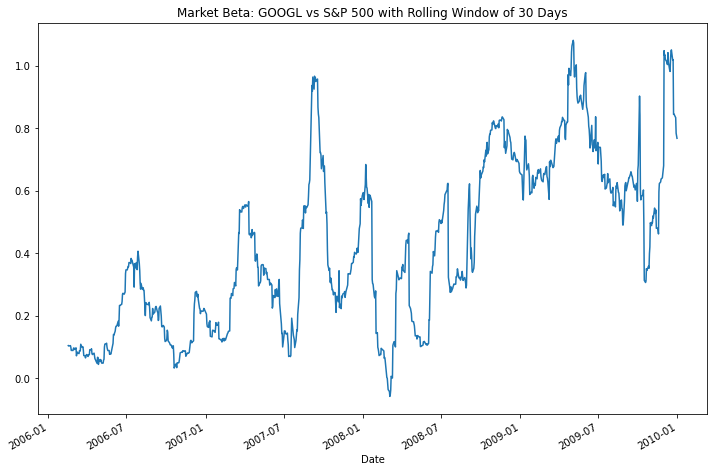

In [16]:
data_dict = {}
tickers = ["GOOGL", "^GSPC"]

for t in tickers: 
    data_dict[t] = yf.download(t, 
                               start = start, 
                               end = end)["Adj Close"]
df = pd.DataFrame(data_dict)

pct_change_dict = {}
for key in df:
    pct_change_dict[key+ " Daily Return"] = df[key].pct_change()
pct_change_data = pd.DataFrame(pct_change_dict)
pct_change_data = pct_change_data.dropna()
beta = market_beta(pct_change_data["GOOGL Daily Return"], pct_change_data["^GSPC Daily Return"], 30)
data = pd.DataFrame(list(zip(*beta)), columns = ['Alpha', 'Beta'])
data.index = pct_change_data.index
plt.figure(figsize=(12,8))
data.Beta.plot.line()
plt.title("Market Beta: GOOGL vs S&P 500 with Rolling Window of 30 Days");

In [24]:
googl = yf.download("GOOGL", 
            start = start, end = end)
imp_vars = ["Volume", "Adj Close"]
googl_df = googl[imp_vars]
googl_df

[*********************100%***********************]  1 of 1 completed


,Volume,Adj Close
Date,,
2006-01-03,26216158,217.832840
2006-01-04,30542227,222.842850
2006-01-05,21594983,225.845840
2006-01-06,35478286,233.063065
2006-01-09,25558216,233.683685
...,...,...
2009-12-24,1715683,309.549561
2009-12-28,3392404,311.746735
2009-12-29,2846750,310.010010


In [25]:
change_df = googl_df.pct_change()
change_df

,Volume,Adj Close
Date,,
2006-01-03,NaN,NaN
2006-01-04,0.165015,0.022999
2006-01-05,-0.292947,0.013476
2006-01-06,0.642895,0.031956
2006-01-09,-0.279610,0.002663
...,...,...
2009-12-24,-0.585709,0.011117
2009-12-28,0.977291,0.007098
2009-12-29,-0.160846,-0.005571
